In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawCheckerboard()

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder, RandomChoiceArgument
from PIL import Image
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawShapeGeometry(shapes=3, foreground=RandomChoiceArgument(["black", "darkgrey"])) \
            .symmetrize(symmetry=RandomChoiceArgument(["horizontal", "vertical", "rotation", "none"])) \
            .fillBackground(background = "white")

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder
from PIL import Image
from IPython.display import display


pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawShapeGeometry(shapes=3, foreground="black", outline="white", maxsize = 96) \
            .spiralize(steps = 16) \
            .fillBackground(background = "black")

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder, SaturationProcessor, GaussianBlurProcessor, GaussianNoiseProcessor
from PIL import Image
from IPython.display import display


pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawCheckerboard(background="lightgreen", foreground="magenta", blocksize=(512//3, 768//3), start = "white")
pipeline.addTask(SaturationProcessor(saturation=-0.5))
pipeline.addTask(GaussianNoiseProcessor(sigma=10))
pipeline.addTask(GaussianBlurProcessor(radius=2))
image = pipeline()

display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder, SimpleTransformProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/test.png")

pipeline = ProcessingPipelineBuilder.fromImage(image) \
            .simpleTransform(transform="flipvertical")

image = pipeline()
display(image)


In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, CannyEdgeProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/rabbit.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
geometry.addTask(CannyEdgeProcessor())

image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ImageProcessorPipeline, DepthEstimationProcessor, NormalEstimationProcessor, SegmentationProcessor, 
                         HEDEdgeDetectionProcessor, MLSDStraightLineDetectionProcessor, PoseDetectionProcessor, ContentShuffleProcessor, PIDIEdgeDetectionProcessor, InitImageProcessor )
from PIL import Image
from IPython.display import display

image = Image.open("data/pose.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
# geometry.addTask(DepthEstimationProcessor())
# geometry.addTask(NormalEstimationProcessor())
# geometry.addTask(SegmentationProcessor())
# geometry.addTask(HEDEdgeDetectionProcessor())
# geometry.addTask(MLSDStraightLineDetectionProcessor())
# geometry.addTask(PoseDetectionProcessor())
# geometry.addTask(ContentShuffleProcessor())
geometry.addTask(PIDIEdgeDetectionProcessor())

image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ProcessingPipelineBuilder, ImageProcessorPipeline, DrawGeometricSpiralProcessor, RandomChoiceArgument, FillBackgroundProcessor )
from PIL import Image
from IPython.display import display

pipeline = (
    ProcessingPipelineBuilder.fromBlank()
            # .fillBackground(background = "black")
            .drawGeometricSpiral(rect=RandomChoiceArgument([(0, 0, 1, 0.5), (0, 0, 0.5, 1)]))
            .symmetrize(symmetry=RandomChoiceArgument(["rotation"]))
            .fillBackground(background = "black")
)

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ProcessingPipelineBuilder, ImageProcessorPipeline, DrawGeometricSpiralProcessor, RandomChoiceArgument, FillBackgroundProcessor )
from PIL import Image
from IPython.display import display

pipeline = (
    ProcessingPipelineBuilder.fromBlank(size=(512, 768))
                             .drawGeometricSpiral(rect=(0, 0, 1, 0.5), draw=(False, True))
                             .symmetrize(symmetry=RandomChoiceArgument(["rotation", "horizontal"]))
                             .fillBackground(background = "black")
)

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( RandomChoiceArgument, RandomImage, ProcessingPipelineBuilder )
from PIL import Image
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromImage(RandomImage.fromDirectory('/Users/rob/GoogleDrive/stable-diffusion/initimages/oscilloscope')) \
            .simpleTransform(transform = RandomChoiceArgument(["fliphorizontal", "flipvertical", "rotate90", "rotate180", "rotate270", "none"])) \
            .resize(resizetype=RandomChoiceArgument(["stretch", "extend"]), 
                    size=RandomChoiceArgument([(512, 768), (768, 512)]),
                    halign=RandomChoiceArgument(["left", "right", "centre"]), 
                    valign=RandomChoiceArgument(["top", "bottom", "centre"]), fill="black"
            )

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( PlaceholderArgument, RandomChoiceArgument, RandomImage, ProcessingPipelineBuilder )
from PIL import Image
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromImage(PlaceholderArgument("image")) \
            .simpleTransform(transform = RandomChoiceArgument(["fliphorizontal", "flipvertical", "rotate90", "rotate180", "rotate270", "none"])) \
            .resize(resizetype=RandomChoiceArgument(["stretch", "extend", "fit"]), 
                    size=PlaceholderArgument("size"),
                    halign=RandomChoiceArgument(["left", "right", "centre"]), 
                    valign=RandomChoiceArgument(["top", "bottom", "centre"]), fill="black"
            )

pipeline.setPlaceholder("image", RandomImage.fromDirectory('/Users/rob/GoogleDrive/stable-diffusion/initimages/oscilloscope'))
pipeline.setPlaceholder("size", (768, 256))

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder
from PIL import Image
from IPython.display import display

from diffuserslib import DrawVoronoiDiagramProcessor
import numpy as np
from functools import partial


# points = np.random.uniform(low=0, high=1, size=(50, 2))
# points = np.random.triangular(left=0, mode=0.5, right=1, size=(50, 2))
points = partial(np.random.normal, loc=0.5, scale=0.15, size=(50, 2))
# points = np.random.normal(loc=0.5, scale=0.15, size=(50, 2))


pipeline = ( 
    ProcessingPipelineBuilder.fromBlank(size=(768, 512))
                             .addTask(DrawVoronoiDiagramProcessor(points = points, draw=(True, False), outline="white"))
                             .fillBackground(background = "black")
)

image = pipeline()
display(image)

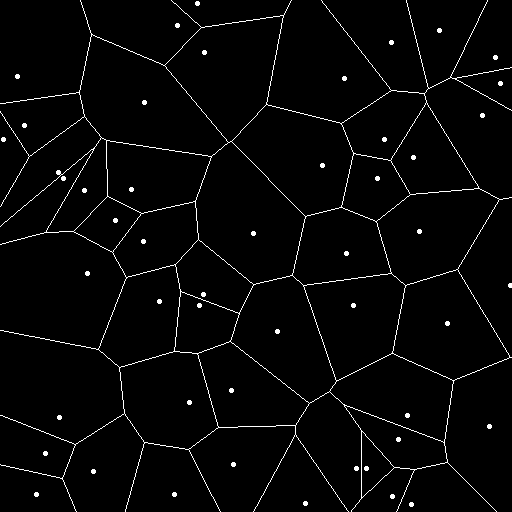

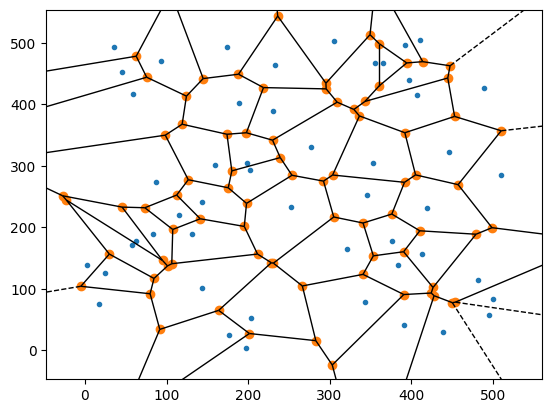

In [172]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import math

points = np.array([[0, 0], [0, 0.5], [0, 1], [0.5, 0], [0.5, 0.5], [0.5, 1], [1, 0], [1, 0.5], [1, 1]])
points = points * 512

# random points
points = np.random.randint(0, 512, size=(50, 2))

voronoi = Voronoi(points)
voronoi_plot_2d(voronoi)
lines = []

centre = voronoi.points.mean(axis=0)

# Plot Voronoi edges
for ridge_points, ridge_vertices in voronoi.ridge_dict.items():
    if -1 not in ridge_vertices:
        # finite ridge between two vertices
        vert1 = voronoi.vertices[ridge_vertices[0]]
        vert2 = voronoi.vertices[ridge_vertices[1]]
        line = (vert1[0], vert1[1], vert2[0], vert2[1])
        lines.append(line)
    else:
        # infinite ridge
        vert = voronoi.vertices[ridge_vertices[1]]
        point1 = voronoi.points[ridge_points[0]]
        point2 = voronoi.points[ridge_points[1]]
        midpoint = (point2 + point1) * 0.5
        normal = (midpoint - vert) / np.linalg.norm(midpoint - vert)
        direction = midpoint - centre
        normal = np.array([math.copysign(normal[0], direction[0]), math.copysign(normal[1], direction[1])])

        endpoint = vert + (normal * 512) # make line go twice as far as midpoint
        line = (vert[0], vert[1], endpoint[0], endpoint[1])
        lines.append(line)


# draw lines on image
image = Image.new("RGB", (512, 512), "black")
draw = ImageDraw.Draw(image)
for line in lines:
    draw.line(line, fill="white", width=1)

#  draw points on image
radius = 2
for point in points:
    draw.ellipse((point[0]-radius, point[1]-radius, point[0]+radius, point[1]+radius), fill="white")

display(image)
